In [1]:
import math as m
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
def sist_sol(t,x_v):
    # x_v = [x,y,vx,vy]
    dx = x_v[2]
    dy = x_v[3]
    r32 = ( x_v[0]**2 + x_v[1]**2 )**1.5
    dvx = -x_v[0]/r32
    dvy = -x_v[1]/r32
    return np.array([dx,dy,dvx,dvy])

def E_s_sol(x_v):
    # x_v = [x,y,vx,vy]
    K = 0.5*(x_v[2]**2 + x_v[3]**2)
    U = -1/np.sqrt(x_v[0]**2 + x_v[1]**2)
    return K+U

def momento_l(x_v):
    # x_v = [x,y,vx,vy]
    return x_v[0]*x_v[3]- x_v[1]*x_v[2]

def Pot_eff(x_v):
    # x_v = [x,y,vx,vy]
    P_cent = 0.5*momento_l(x_v)**2/(x_v[0]**2 + x_v[1]**2)
    P_grav = -1/np.sqrt(x_v[0]**2 + x_v[1]**2)
    return P_cent + P_grav

def Pot_eff_r(r,ci):
    m_ang = momento_l(ci)
    return (0.5*m_ang**2)/r**2 - 1/r

In [3]:
t = np.linspace(0,30*np.pi,100)
vx = [0.5,0.8,0.9,1,1.1]
n_ci = []
for vxi in vx:
    ci = np.array([1,0,vxi,1])
    sol = sp.solve_ivp(sist_sol,(t[0],t[-1]),ci,dense_output=True,atol=1e-9,rtol=1e-9)
    tray = sol.sol(t)
    x , y = tray[0] , tray[1]
    x_v_f = sol.sol(t[-1])
    n_ci.append(np.array([x_v_f[0],x_v_f[1],-x_v_f[2],-x_v_f[3]]))

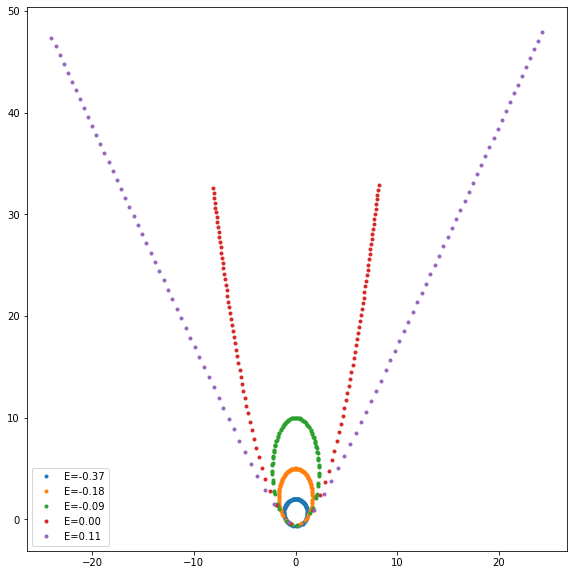

In [4]:
t = np.linspace(0,60*np.pi,100)
plt.figure(figsize=(10,10))
pos_x = np.zeros((len(vx),len(t)))
pos_y = np.zeros((len(vx),len(t)))
for i in range(len(n_ci)):
    Ener = E_s_sol(n_ci[i])
    sol = sp.solve_ivp(sist_sol,(t[0],t[-1]),n_ci[i],dense_output=True,atol=1e-9,rtol=1e-9)
    tray = sol.sol(t)
    x , y = tray[0] , tray[1]
    pos_x[i,:] , pos_y[i,:] = x , y
    plt.plot(x,y,'.',label='E=%2.2f' %Ener)
plt.legend()
plt.gca().set_aspect('equal')

In [5]:
%%capture
figura , ejes = plt.subplots()
ejes.set_xlim([-30,30]) , ejes.set_ylim([-5,50])
planeta, = ejes.plot([],[],'o')
linea, = ejes.plot([],[],'--')

def peli(i):
    planeta.set_data(pos_x[-1,i],pos_y[-1,i])
    linea.set_data(pos_x[-1,:i],pos_y[-1,:i])
    return (planeta,linea,)

mi_pelicula = animation.FuncAnimation(figura,peli,frames=len(t),interval=40)

In [21]:
HTML(mi_pelicula.to_html5_video())